In [1]:
import networkx as nx
import EoN as EoN
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import random

random.seed(3)

sequence=[1]
while sum(sequence)%2==1:
    sequence = np.random.poisson(1,10000)+1
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N
IC = defaultdict(lambda: 'S')
for node in range(10):
    IC[node] = 'I'

return_statuses = ('S', 'E', 'I', 'R')

In [7]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.yscale('log')
    plt.xlabel("Degree")
    plt.show()

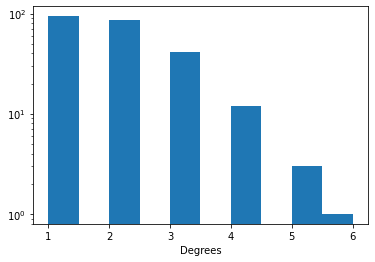

In [3]:
sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 60, return_full_data = True)
degrees = [sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")
#ax2.set_title('Transmision Tree Degree Distribution')

plt.show()

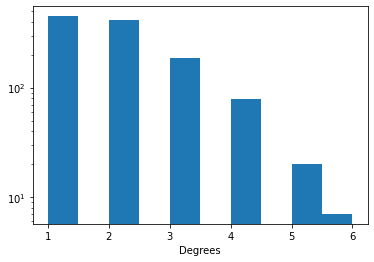

In [4]:
sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 120, return_full_data = True)
degrees = [sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")
#ax2.set_title('Transmision Tree Degree Distribution')

plt.show()

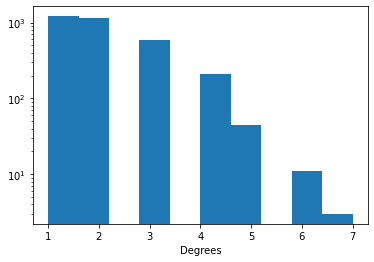

In [5]:
sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 180, return_full_data = True)
degrees = [sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()]

# setup figures
fig = plt.figure()
ax2=fig.add_subplot()
ax2.hist(degrees)
ax2.set_yscale('log')
ax2.set_xlabel("Degrees")
#ax2.set_title('Transmision Tree Degree Distribution')

plt.show()

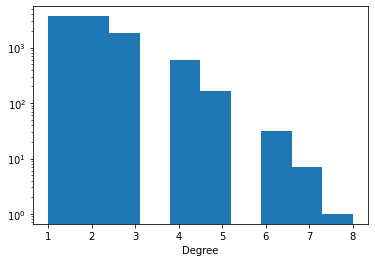

In [8]:
plot_degree_dist(G)